<h3> Soluzioni di equazioni differenziali ordinarie: cinetica chimica </h3>


Le equazioni differenziali ordinarie, ode, sono equazioni differenziali nella forma $y'(t)=f(y, t)$.
Molti fenomeni chimici e fisici ubbidiscono ad equazioni di questo tipo, fra questi le equazioni della
cinetica chimica.

Nella cinetica chimica, tipicamente y(t) è il vettore delle concentrazioni di tutte le sostanze coinvolte nella reazione.

Ma anche l'equazione dell'oscillazione armonica è una ODE:

$$y''=-ky$$

$$
\begin{pmatrix}
y \\ y'
\end{pmatrix} ^\prime = 
\begin{pmatrix}
y' \\
- k y
\end{pmatrix}
$$

e come vedremo, con la stessa tecnica, anche l'equazione di Schrödinger è una ODE

Ci sono diverse librerie per la soluzione di ODE, il nostro punto d'ingresso sarà la funzione
`scipy.odeint`:

`odeint(t, ...)`,

di quali parametri avrà bisogno?

Per scaldare i muscoli consideriamo una reazione

A + B <=> C,

che soddisfi la seguente legge cinetica:

$v= -a' = -b' = c' = k_d a b - k_i c$, con

a=[A], b=[B] e c=[C].

Qualunque sia il metodo che usiamo per risolvere le nostre equazioni differenziali, avrà bisogno
delle seguenti informazioni:

$[a', b', c'] = f([a, b, c], t)$; le equazioni della cinetica chimica però in genere non dipendono esplicitamente dal tempo;

$[a, b, c]_{t=0}$; le condizioni iniziali

$[t_i]_{i=0,n}$; i tempi a cui si vogliono avere le soluzioni.

Cominciamo con il definire la funzione $f$ per la nostra cinetica chimica, dobbiamo codificare
un vettore delle concentrazioni, per esempio:
y=[a, b, c]

In [2]:
import numpy as np
import scipy.integrate as ntg
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
import ipywidgets as wi

In [3]:
def cinetica(y, t, k_d, k_i):
    q=k_d*y[0]*y[1]-k_i*y[2]    # q=k_d*a*b - k_i*c
    return np.array([-q, -q, q])

la funzione cinetica restituisce le velocità di variazione delle concentrazioni $a, b, c$.
python offre diverse possibilità di soluzione per le ODE, in numpy troviamo per esempio  odeint

(20, 3)


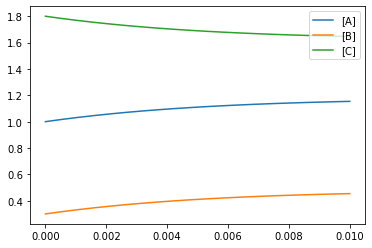

In [8]:

y0=np.array([1.0, 0.3, 1.8]) # concentrazioni iniziali
t=np.linspace(0.0, 0.01, 20)
soluzione=ntg.odeint(cinetica, y0, t, args=(1.0e2,35.0))
print(soluzione.shape)
linee=plt.plot(t, soluzione)
plt.legend(linee, ['[A]','[B]','[C]'])


note:

1. è importante scegliere i tempi per la soluzione in maniera sensata, con la costante cinetica
impostata la reazione si conclude in meno di 0.01 secondi, provate valori diversi
2. odeint ci restituisce come soluzione una matrice di dimensioni n_t*n_y, è possibile interrogare una matrice sulle sue dimensioni tramite l'attributo shape
3. odeint, ci permette di passare comodamente dei parametri aggiuntivi alla funzione differenziale, in questo caso k_d e k_i, che invece è necessario passare diversamente per esempio nella odeint di matlab.


Ora risolvete il problema della cinetica enzimatica, una reazione che avviene secondo lo schema:

S + E <=> SE -> P + E

l'enzima è in genere presente in piccole quantità e limita la massima concentrazione ottenibile [SE].


In [5]:
def enzim(y, t, ka=1, kd=1, k=1):
    s,e,se,p=y
    s_d= -ka*s*e + kd*se
    e_d= -ka*s*e +k*se + kd*se
    se_d= ka*s*e - kd*se -k*se  # se_d=-s_e
    p_d= k*se
    return [s_d, e_d, se_d, p_d]

In [9]:
@interact(
    s0=wi.FloatText(value=1.0), 
    e0=wi.FloatText(value=0.05),
    se0=wi.FloatText(value=0.0),
    p0=wi.FloatText(value=0.0), 
    ka=wi.FloatText(value=1.0),
    kd=wi.FloatText(value=0.2),
    k=wi.FloatText(value=0.05),
    t_fin=wi.FloatText(value=100)
    )
def risolvi(s0,e0,se0,p0,ka,kd,k,t_fin):
    y0=np.array([s0,e0,se0,p0]) # concentrazioni iniziali
    t=np.linspace(0.0, t_fin, 200)
    soluzione=ntg.odeint(enzim, y0, t, args=(ka, kd, k))
    print(soluzione.shape)
    linee=plt.plot(t, soluzione)
    plt.legend(linee, ['[S]','[E]','[SE]','[P]'])


interactive(children=(FloatText(value=1.0, description='s0'), FloatText(value=0.05, description='e0'), FloatTe…